# Face Recognition using CNN model

 # Step1:
 
Importing libraries


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step2:

* Load Dataset :
Loading and normalizing

In [19]:
#load dataset
data = np.load('/content/drive/MyDrive/ORL_faces.npz') 

In [20]:
np.unique(data)

array(['testX', 'testY', 'trainX', 'trainY'], dtype='<U6')

In [21]:
#extract the train data and normalize it
x_train = data['trainX']
x_train = np.array(x_train, dtype = 'float32')/255

In [24]:
#extract the train data and normalize it
x_test = data['testX']
x_test = np.array(x_test, dtype = 'float32')/255

In [25]:
y_train= data['trainY']
y_test= data['testY']

In [27]:
print(x_train.shape)
print(x_test.shape)

(240, 10304)
(160, 10304)


# Step 3

Split DataSet : 



In [29]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [30]:
print(x_train.shape[0])
print(x_valid.shape[0])

216
12


# Step 4

Change the shape of the data

In [69]:
#reshaping data
x_train = x_train.reshape(-1,224,46,1)
x_test = x_test.reshape(-1, 224, 46, 1)
x_valid = x_valid.reshape(-1, 224, 46, 1)

print(x_train.shape)
print(x_test.shape)
print(y_test)

(216, 224, 46, 1)
(160, 224, 46, 1)
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]


# Step 5


Build CNN model:
 
 

In [70]:
im_shape = (224,46,1)

In [71]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show the model's parameters.

In [72]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 218, 40, 36)       1800      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 109, 20, 36)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 105, 16, 54)       48654     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 52, 8, 54)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 22464)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2024)              45469160  
_________________________________________________________________
dropout_6 (Dropout)          (None, 2024)             

# Step 6

Train the Model

* Note: You can change the number of epochs


In [73]:
train_model=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 7s - loss: 2.9991 - accuracy: 0.0741 - val_loss: 3.0139 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 6s - loss: 2.9840 - accuracy: 0.0509 - val_loss: 3.0191 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 6s - loss: 3.0054 - accuracy: 0.0833 - val_loss: 3.0278 - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 - 6s - loss: 2.9983 - accuracy: 0.0417 - val_loss: 3.0287 - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 - 6s - loss: 3.0179 - accuracy: 0.0648 - val_loss: 3.0205 - val_accuracy: 0.0833
Epoch 6/250
1/1 - 6s - loss: 3.0044 - accuracy: 0.0648 - val_loss: 3.0154 - val_accuracy: 0.0833
Epoch 7/250
1/1 - 6s - loss: 2.9928 - accuracy: 0.0602 - val_loss: 3.0122 - val_accuracy: 0.0833
Epoch 8/250
1/1 - 6s - loss: 3.0120 - accuracy: 0.0694 - val_loss: 3.0079 - val_accuracy: 0.0833
Epoch 9/250
1/1 - 6s - loss: 3.0028 - accuracy: 0.0509 - val_loss: 3.0024 - val_accuracy: 0.0833
Epoch 10/250
1/1 - 6s - loss: 3.0045 - accuracy: 0.0602 - val_loss: 2.9992 - val_accuracy: 0.0833
Epoch 11/250


Evaluate the test data


In [75]:
scor = cnn_model.evaluate(np.array(x_test),  np.array(y_test), verbose=1)
print(scor)

5/5 [==============================] - 1s 253ms/step - loss: 0.2212 - accuracy: 0.9375
[0.22119109332561493, 0.9375]


In [76]:
train_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Step 7 

plot the result

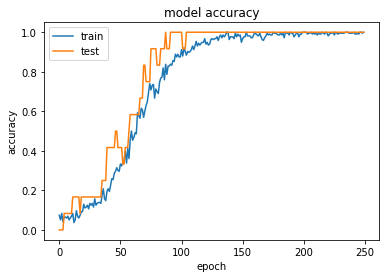

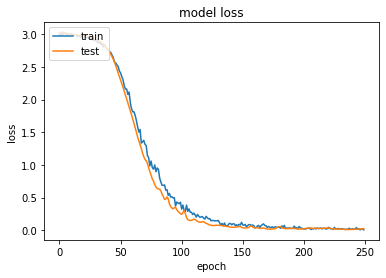

In [77]:
# Graph the summarize history for accuracy
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Graph the summarize history for loss
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# step 8

Plot Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy : 
0.9375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


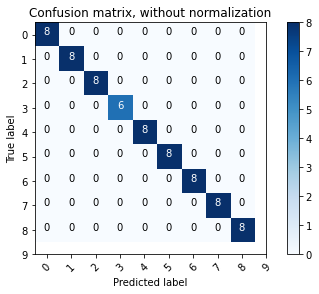

Confusion matrix, without normalization


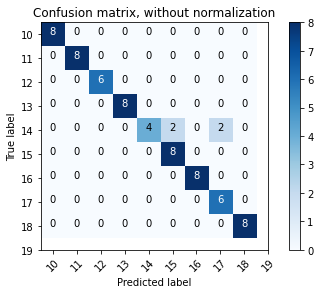

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1

In [78]:
predicted =np.array(cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc = accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew[0:160]))
print(classification_report(np.array(y_test), ynew[0:160]))